In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [2]:
# Load vehicle data set into pandas
vehicle_data = pd.read_csv("../Resources/singapore-motor-vehicle-population.csv")
vehicle_data.head()

,year,type,engine,number
0,2006,Cars,Petrol,471707
1,2006,Cars,Diesel,7
2,2006,Cars,Petrol-Electric,379
3,2006,Cars,Petrol-Electric (Plug-In),0
4,2006,Cars,Petrol-CNG,214


In [3]:
small_df = vehicle_data.loc[(vehicle_data["type"]=="Cars") & (vehicle_data["engine"]=="Petrol-Electric"),:]

In [4]:
small_df

,year,type,engine,number
2,2006,Cars,Petrol-Electric,379
32,2007,Cars,Petrol-Electric,1057
62,2008,Cars,Petrol-Electric,1999
92,2009,Cars,Petrol-Electric,2637
122,2010,Cars,Petrol-Electric,3305
152,2011,Cars,Petrol-Electric,3786
182,2012,Cars,Petrol-Electric,4684
212,2013,Cars,Petrol-Electric,5020
242,2014,Cars,Petrol-Electric,5727
272,2015,Cars,Petrol-Electric,6371


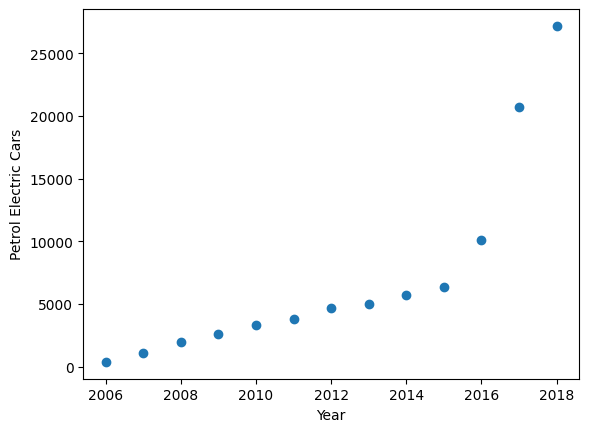

In [10]:
# Generate a scatter plot of year versus number of petrol-electric cars
x = small_df.year
y = small_df.number
plt.scatter(x,y)
plt.xlabel('Year')
plt.ylabel('Petrol Electric Cars')
plt.show()

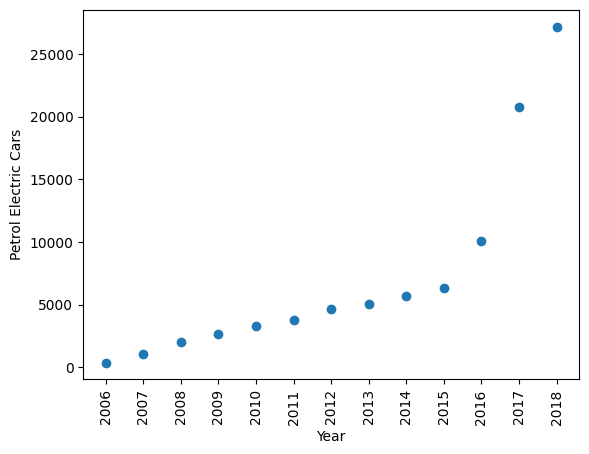

In [12]:
# Generate a scatter plot of year versus number of petrol-electric cars
year = vehicle_data.loc[(vehicle_data["type"]=="Cars") & (vehicle_data["engine"]=="Petrol-Electric"),"year"]
petrol_electric_cars = vehicle_data.loc[(vehicle_data["type"]=="Cars") & (vehicle_data["engine"]=="Petrol-Electric"),"number"]
plt.scatter(year,petrol_electric_cars)
plt.xticks(year, rotation=90)
plt.xlabel('Year')
plt.ylabel('Petrol Electric Cars')
plt.show()

In [13]:
# Perform a linear regression on year versus petrol-electric cars
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(year, petrol_electric_cars)

In [14]:
# Create equation of line to calculate predicted number of petrol-electric cars
pe_fit = pe_slope * year + pe_int

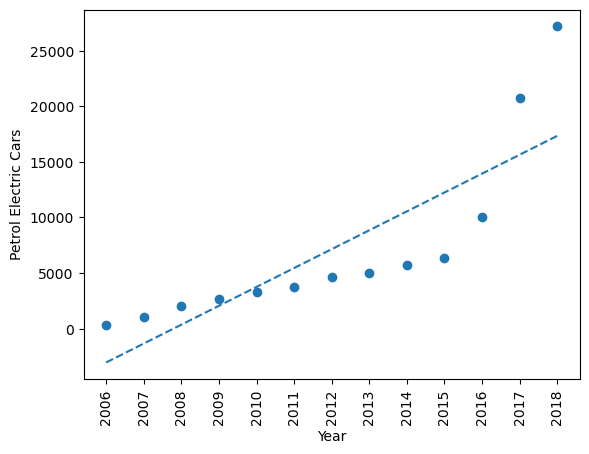

In [6]:
# Plot the linear model on top of scatter plot
year = vehicle_data.loc[(vehicle_data["type"]=="Cars") & (vehicle_data["engine"]=="Petrol-Electric"),"year"]
petrol_electric_cars = vehicle_data.loc[(vehicle_data["type"]=="Cars") & (vehicle_data["engine"]=="Petrol-Electric"),"number"]
plt.scatter(year,petrol_electric_cars)
plt.plot(year,pe_fit,"--")
plt.xticks(year, rotation=90)
plt.xlabel('Year')
plt.ylabel('Petrol Electric Cars')
plt.show()

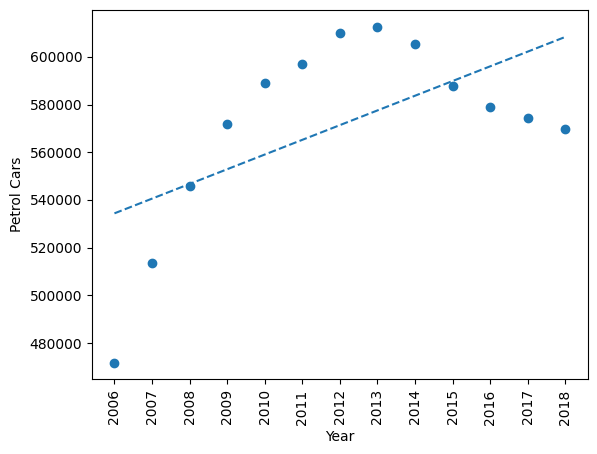

In [15]:
# Repeat plotting scatter and linear model for year versus petrol cars
petrol_cars = vehicle_data.loc[(vehicle_data["type"]=="Cars") & (vehicle_data["engine"]=="Petrol"), "number"]
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(year, petrol_cars)
p_fit = p_slope * year + p_int
plt.scatter(year,petrol_cars)
plt.plot(year,p_fit,"--")
plt.xticks(year, rotation=90)
plt.xlabel('Year')
plt.ylabel('Petrol Cars')
plt.show()

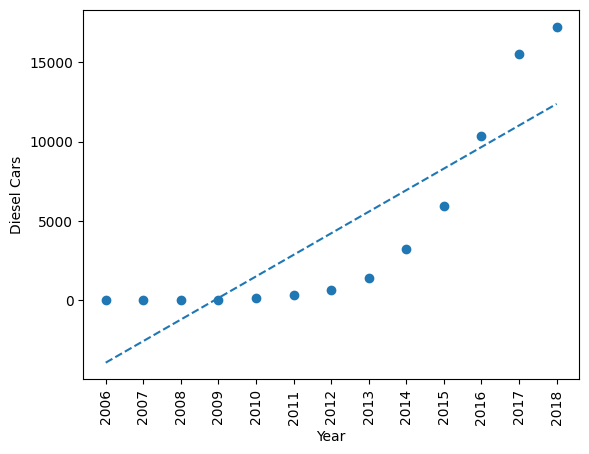

In [16]:
# Repeat plotting scatter and linear model for year versus electric cars
diesel_cars = vehicle_data.loc[(vehicle_data["type"]=="Cars") & (vehicle_data["engine"]=="Diesel"), "number"]
d_slope, d_int, d_r, d_p, d_std_err = stats.linregress(
    year, diesel_cars)
d_fit = d_slope * year + d_int
plt.scatter(year,diesel_cars)
plt.plot(year,d_fit,"--")
plt.xticks(year, rotation=90)
plt.xlabel('Year')
plt.ylabel('Diesel Cars')
plt.show()

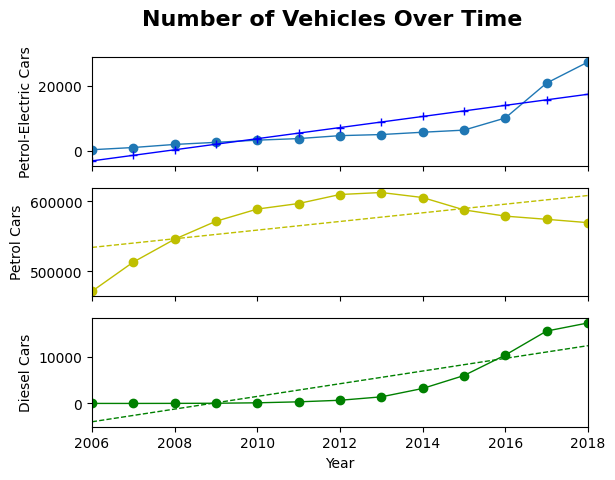

In [22]:
# Generate a facet plot of all 3 figures
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Number of Vehicles Over Time", fontsize=16, fontweight="bold")

ax1.set_xlim(min(year), max(year))
ax1.plot(year, petrol_electric_cars, linewidth=1, marker="o")
ax1.plot(year, pe_fit, "b-+", linewidth=1)
ax1.set_ylabel("Petrol-Electric Cars")

ax2.plot(year, petrol_cars, linewidth=1, marker="o", color="y")
ax2.plot(year, p_fit, "y--", linewidth=1)
ax2.set_ylabel("Petrol Cars")

ax3.plot(year, diesel_cars, linewidth=1, marker="o", color="g")
ax3.plot(year, d_fit, "g--", linewidth=1)
ax3.set_ylabel("Diesel Cars")
ax3.set_xlabel("Year")

plt.show()

In [10]:
# Calculate the number of cars for 2024
year = 2024
print(f"The number of petrol-electic cars in 2024 will be {round(pe_slope * year + pe_int,0)}.")
print(f"The number of petrol cars in 2024 will be {round(p_slope * year + p_int,0)}.")
print(f"The number of diesel cars in 2024 will be {round(d_slope * year + d_int,0)}.")

The number of petrol-electic cars in 2024 will be 27516.0.
The number of petrol cars in 2024 will be 645370.0.
The number of diesel cars in 2024 will be 20541.0.
